In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "Sabor": ["Chocolate", "Vainilla", "Fresa", "Mango", "Limón", "Napolitano", "Menta", "Chocochips", "Nuez", "Cajeta"],
    "Ordenes": [1600,  870, 790,  500, 1325, 1050, 120,  450, 75, 290]
    })

In [3]:
df.head(10)

,Sabor,Ordenes
0,Chocolate,1600
1,Vainilla,870
2,Fresa,790
3,Mango,500
4,Limón,1325
5,Napolitano,1050
6,Menta,120
7,Chocochips,450
8,Nuez,75
9,Cajeta,290


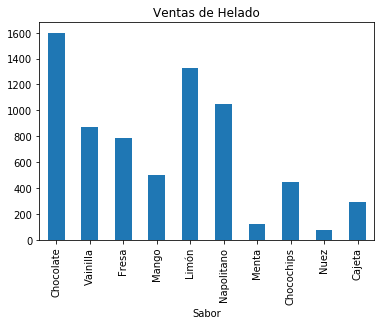

In [4]:
df.plot(kind='bar', x="Sabor", y="Ordenes", legend=None, title="Ventas de Helado")
plt.show()

In [5]:
df["Sabor"]

0     Chocolate
1      Vainilla
2         Fresa
3         Mango
4         Limón
5    Napolitano
6         Menta
7    Chocochips
8          Nuez
9        Cajeta
Name: Sabor, dtype: object

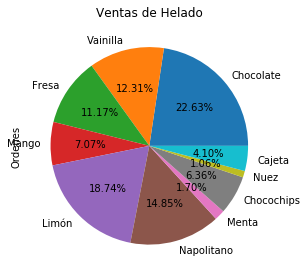

In [6]:
df.plot(kind='pie', labels=df["Sabor"], y="Ordenes", legend=None, autopct="%.2f%%", title="Ventas de Helado")
plt.tight_layout()
plt.show()

In [7]:
tmp = df.sort_values("Ordenes", ascending=False)
tmp

,Sabor,Ordenes
0,Chocolate,1600
4,Limón,1325
5,Napolitano,1050
1,Vainilla,870
2,Fresa,790
3,Mango,500
7,Chocochips,450
9,Cajeta,290
6,Menta,120
8,Nuez,75


In [8]:
x = tmp["Sabor"].values
y = tmp["Ordenes"].values
print(x)
print(y)
print(type(x))
print(type(y))

['Chocolate' 'Limón' 'Napolitano' 'Vainilla' 'Fresa' 'Mango' 'Chocochips'
 'Cajeta' 'Menta' 'Nuez']
[1600 1325 1050  870  790  500  450  290  120   75]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
xlabel="Sabor"
ylabel="Ordenes"
print(xlabel)
print(ylabel)
print(type(xlabel))
print(type(ylabel))

Sabor
Ordenes
<class 'str'>
<class 'str'>


In [10]:
ponderado = y / y.sum()
ponderado

array([0.22630835, 0.1874116 , 0.14851485, 0.12305516, 0.11173975,
       0.07072136, 0.06364922, 0.04101839, 0.01697313, 0.0106082 ])

In [11]:
suma_acum = ponderado.cumsum()
suma_acum

array([0.22630835, 0.41371994, 0.56223479, 0.68528996, 0.7970297 ,
       0.86775106, 0.93140028, 0.97241867, 0.9893918 , 1.        ])

In [12]:
tmp["ponderado"]=ponderado
tmp["acumulado"]=suma_acum
tmp

,Sabor,Ordenes,ponderado,acumulado
0,Chocolate,1600,0.226308,0.226308
4,Limón,1325,0.187412,0.413720
5,Napolitano,1050,0.148515,0.562235
1,Vainilla,870,0.123055,0.685290
2,Fresa,790,0.111740,0.797030
3,Mango,500,0.070721,0.867751
7,Chocochips,450,0.063649,0.931400
9,Cajeta,290,0.041018,0.972419
6,Menta,120,0.016973,0.989392
8,Nuez,75,0.010608,1.000000


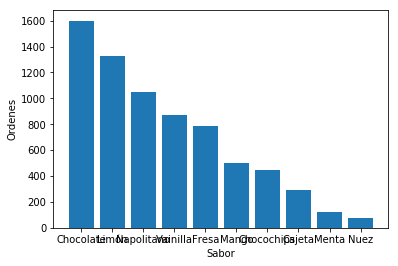

In [13]:
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
plt.show()

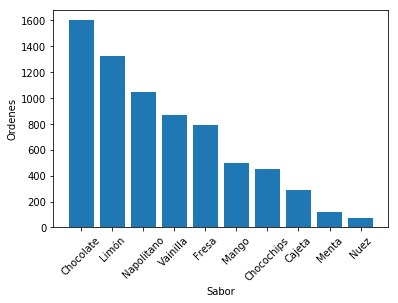

In [14]:
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_xticklabels(x,rotation=45)
plt.show()

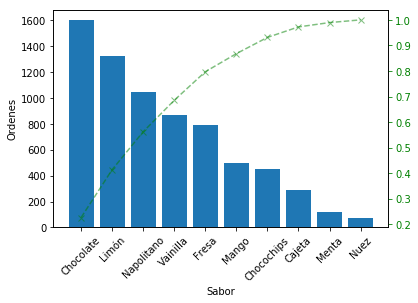

In [15]:
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_xticklabels(x,rotation=45)

# Creamos una gráfica en el eje y opuesta a la original mediante el método twinx
ax2 = ax1.twinx()

# "-ro": el doble guión medio indica que será una línea segmentada, la g es el color verde, 
#        y la o indica marcadores con forma de puntos
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

ax2.plot(x, suma_acum, "--gx", alpha=0.5)
ax2.set_ylabel("", color='g')
ax2.tick_params("y", colors='g')


plt.show()

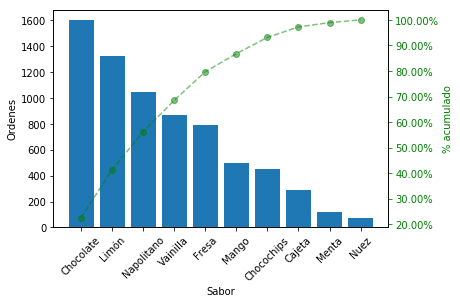

In [16]:
fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_xticklabels(x,rotation=45)

# Creamos una gráfica en el eje y opuesta a la original mediante el método twinx
ax2 = ax1.twinx()

# "-ro": el doble guión medio indica que será una línea segmentada, la g es el color verde, 
#        y la o indica marcadores con forma de puntos
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

ax2.plot(x, suma_acum, "--go", alpha=0.5)
ax2.set_ylabel("% acumulado", color='g')
ax2.tick_params("y", colors='g')

# Las siguientes instrucciones modifican los marcadores del eje Y para tener formato de %
vals = ax2.get_yticks()
ax2.set_yticklabels(["{:,.2%}".format(x) for x in vals])

plt.show()

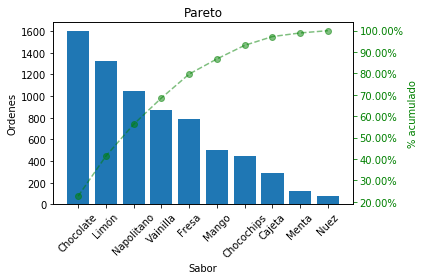

In [17]:
# https://pyformat.info/
sin_decimales="{0:,.0%}"
dos_decimales="{0:,.2%}"

fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_xticklabels(x,rotation=45)

# Creamos una gráfica en el eje y opuesta a la original mediante el método twinx
ax2 = ax1.twinx()

# "-ro": el doble guión medio indica que será una línea segmentada, la g es el color verde, 
#        y la o indica marcadores con forma de puntos
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

ax2.plot(x, suma_acum, "--go", alpha=0.5)
ax2.set_ylabel("% acumulado", color='g')
ax2.tick_params("y", colors='g')

vals = ax2.get_yticks()
ax2.set_yticklabels([dos_decimales.format(i) for i in vals])

ponderaciones_pct = [sin_decimales.format(i) for i in suma_acum]

plt.title("Pareto")
    
plt.tight_layout()
plt.show()

In [18]:
print(suma_acum)
print(ponderaciones_pct)

[0.22630835 0.41371994 0.56223479 0.68528996 0.7970297  0.86775106
 0.93140028 0.97241867 0.9893918  1.        ]
['23%', '41%', '56%', '69%', '80%', '87%', '93%', '97%', '99%', '100%']


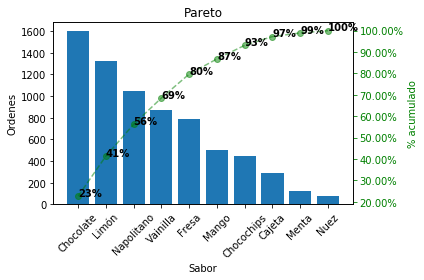

In [19]:
# https://pyformat.info/
sin_decimales="{0:,.0%}"
dos_decimales="{0:,.2%}"

fig, ax1 = plt.subplots()
ax1.bar(x, y)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)
ax1.set_xticklabels(x,rotation=45)

# Creamos una gráfica en el eje y opuesta a la original mediante el método twinx
ax2 = ax1.twinx()

# "-ro": el doble guión medio indica que será una línea segmentada, la g es el color verde, 
#        y la o indica marcadores con forma de puntos
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

ax2.plot(x, suma_acum, "--go", alpha=0.5)
ax2.set_ylabel("% acumulado", color='g')
ax2.tick_params("y", colors='g')

vals = ax2.get_yticks()
ax2.set_yticklabels([dos_decimales.format(i) for i in vals])


# Las siguientes instrucciones sirven para colocar las anotaciones de porcentaje en la 
# línea de valores acumulados.
ponderaciones_pct = [sin_decimales.format(i) for i in suma_acum]
for j, txt in enumerate(ponderaciones_pct):
    ax2.annotate(txt, (x[j], suma_acum[j]), fontweight='heavy')    
    

plt.title("Pareto")
    
plt.tight_layout()
plt.show()

In [20]:
def pareto_plot(df, x=None, y=None, titulo=None, decimal_acum_y=2, sindecimal=True):
    import pandas as pd
    import seaborn as sns

    import matplotlib.pyplot as plt
    %matplotlib inline
    '''
    La siguiente función sirve para crear un Pareto a partir de cualquier DataFrame creado en Pandas
    Es necesario seleccionar la columna x (Cualitativa) y la columna y (Cuantitativa)
    '''
    xlabel = x
    ylabel = y
    tmp= pd.DataFrame({xlabel:df[x].values, ylabel:df[y].values})
    tmp = tmp.sort_values(ylabel, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    ponderado = y / y.sum()
    suma_acum = ponderado.cumsum()
    
    # https://pyformat.info/
    if sindecimal==True:
        sin_decimales="{0:,.0%}"
    else:
        sin_decimales="{0:,.2%}"
    
    
    dos_decimales="{0:,." + str(decimal_acum_y) + "%}"

    fig, ax1 = plt.subplots()
    
    fig.set_figwidth(12)
    
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel(ylabel)

    # Creamos una gráfica en el eje y opuesta a la original mediante el método twinx
    ax2 = ax1.twinx()

    # "-ro": el doble guión medio indica que será una línea segmentada, la g es el color verde, 
    #        y la o indica marcadores con forma de puntos
    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
    ax2.plot(x, suma_acum, "--go", alpha=0.5)
    ax2.set_ylabel("% acumulado", color='g')
    ax2.tick_params("y", colors='g')

    vals = ax2.get_yticks()
    ax2.set_yticklabels([dos_decimales.format(i) for i in vals])


    # Las siguientes instrucciones sirven para colocar las anotaciones de porcentaje en la 
    # línea de valores acumulados.
    ponderaciones_pct = [sin_decimales.format(i) for i in suma_acum]
    for j, txt in enumerate(ponderaciones_pct):
        ax2.annotate(txt, (x[j], suma_acum[j]), fontweight='heavy')    


    plt.title(titulo)
    # Código para determinar los puntos donde colocar las líneas verticales que dividan
    # las secciones A, B, y C
    
    punto1=0
    punto2=0
    for k1,valor1 in enumerate(suma_acum,0):
        if valor1>=0.79:
            punto1=k1
            for k2,valor2 in enumerate(suma_acum,0):
                if valor2>=0.89:
                    punto2=k2
                    break
            break
    plt.axvline(x=x[punto1],color='red', linestyle='--')
    plt.axvline(x=x[punto2],color='red', linestyle='--')
    
    plt.text(round(punto1/2,0), 0.95, "A", size=16, color='r')
    plt.text(punto1+0.5, 0.95, "B", size=16, color='r')
    plt.text(punto2+0.5, 0.95, "C", size=16, color='r')
    plt.tight_layout()
    
    tmp["ponderado"]=ponderado
    tmp[" % acumulado"]=ponderaciones_pct
    print("\nTabla Pareto\n")
    print(tmp.head(10))
    print()
    plt.show()


Tabla Pareto

        Sabor  Ordenes  ponderado  % acumulado
0   Chocolate     1600   0.226308          23%
4       Limón     1325   0.187412          41%
5  Napolitano     1050   0.148515          56%
1    Vainilla      870   0.123055          69%
2       Fresa      790   0.111740          80%
3       Mango      500   0.070721          87%
7  Chocochips      450   0.063649          93%
9      Cajeta      290   0.041018          97%
6       Menta      120   0.016973          99%
8        Nuez       75   0.010608         100%



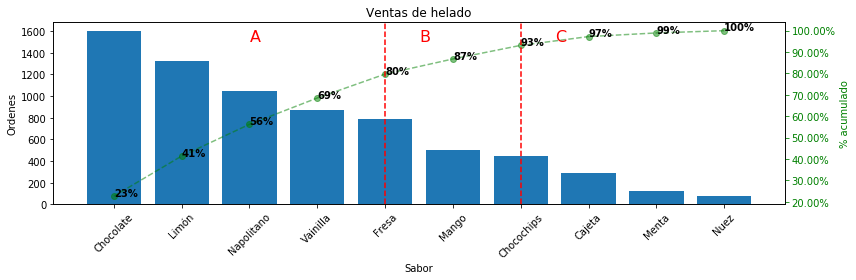

In [21]:
pareto_plot(df, x="Sabor", y="Ordenes", titulo="Ventas de helado")